## Initializing data

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
df=pd.read_csv("housingdata.csv",header=None)

In [3]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns=housing_colnames
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## SKLEARN

In [4]:
X=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y=df['MEDV'].values

In [5]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
y_pred=reg.predict(X)

In [7]:
dff = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1 = dff.head(10)
df1

,Actual,Predicted
0,24.0,30.003843
1,21.6,25.025562
2,34.7,30.567597
3,33.4,28.607036
4,36.2,27.943524
5,28.7,25.256284
6,22.9,23.001808
7,27.1,19.535988
8,16.5,11.523637
9,18.9,18.920262


## GRADIENT DESCENT

In [8]:
#mean normalization
#my_data = (df - df.mean())/df.std()
my_data=df
my_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
#setting the matrices
X2 = my_data.iloc[:,0:13]
ones = np.ones([X2.shape[0],1])
X2 = np.concatenate((ones,X2),axis=1)

y2 = my_data.iloc[:,13:14].values 
theta = np.zeros([1,14])

xtemp=df.iloc[:,0:13]
ones = np.ones([xtemp.shape[0],1])
xtemp = np.concatenate((ones,xtemp),axis=1)

In [10]:
t0=[]
t1=[]
cst=[]

In [11]:
#computecost
def computeCost(X2,y2,theta):
    tobesummed = np.power(((X2 @ theta.T)-y2),2)
    return np.sum(tobesummed)/(2 * len(X2))

def gradientDescent(X2,y2,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X2)) * np.sum(X2 * (X2 @ theta.T - y2), axis=0)
        cost[i] = computeCost(X2, y2, theta)
        t0.append(theta[0,0])
        t1.append(theta[0,1])
        cst.append(cost[i])

    return theta,cost

In [12]:
#set hyper parameters
alpha = 0.000001
iters = 10000
theta = np.zeros([1,14])

In [13]:
theta,cost = gradientDescent(X2,y2,theta,iters,alpha)
print(theta)

[[ 0.00592    -0.06393063  0.12999067 -0.037365    0.00385067  0.00209638
   0.0704665   0.06195775  0.013075    0.0032703   0.00145345  0.04773669
   0.04866925 -0.19360688]]


In [14]:
finalCost = computeCost(X2,y2,theta)
print(finalCost)

h=xtemp @ theta.T


31.596591409570713


In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Normal Equation

In [16]:
ntheta = (np.linalg.pinv(X2.T@X2)@(X2.T))@y

In [17]:
n_pred=ntheta@X2.T

## Comparisons

In [18]:
y_pred=y_pred.reshape(506,1)
n_pred=n_pred.reshape(506,1);

In [19]:
df['pred1']=y_pred
df['pred2']=n_pred
df['pred3']=h
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,pred1,pred2,pred3
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843,30.003843,26.333125
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562,25.025562,23.902108
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597,30.567597,23.644345
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036,28.607036,23.195701
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524,27.943524,23.372059


In [20]:
a=df[['pred1']]
b=df[['pred2']]
c=df[['pred3']]

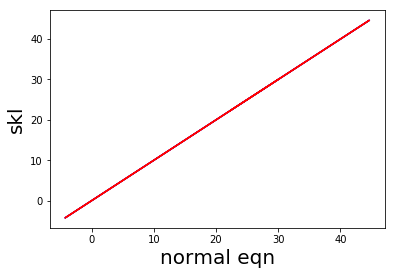

In [21]:
r1=linear_model.LinearRegression()
r1.fit(y_pred,n_pred)

%matplotlib inline
plt.xlabel('normal eqn', fontsize=20)
plt.ylabel('skl', fontsize=20)
plt.plot(df.pred2,df.pred1,color='blue')
plt.plot(df.pred2,r1.predict(b),color='red')

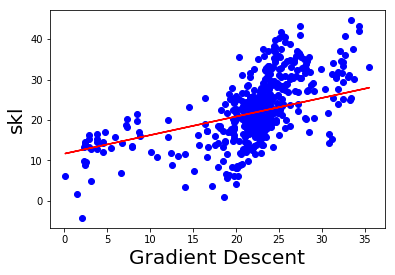

In [22]:
r2=linear_model.LinearRegression()
r2.fit(y_pred,h)

%matplotlib inline
plt.xlabel('Gradient Descent', fontsize=20)
plt.ylabel('skl', fontsize=20)
plt.scatter(df.pred3,df.pred1,color='blue')
plt.plot(df.pred3,r2.predict(c),color='red')

In [23]:
crim=df['CRIM'].values
zn=df['ZN'].values
X = np.column_stack((np.ones(len(crim)), crim))
y = zn

In [24]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [25]:
Xs, Ys = np.meshgrid(np.linspace(0.00002, 0.006, 50), np.linspace(-0.06, 0.00008,50))
Zs = np.array([compute_cost(X, y, [t0, t1]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plotly
plotly.tools.set_credentials_file(username='satwikm', api_key='Xlx09yUbVaatr6zg1vpc')

data = [
    go.Surface(
        x=Xs, y=Ys, z=Zs
    )
]
layout = go.Layout(
    title='Cost Function',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~satwikm/0 or inside your plot.ly account where it is named 'elevations-3d-surface'
